Enter Population Size to Begin With5
Enter Number of Sides of Polygon To Begin With5
Enter Number of Iteration to perform on GA10
Value= 10
L val:: 0
Population is:: [[[127, 106], [7, 168], [225, 187], [203, 22], [232, 19]], [[137, 85], [50, 52], [115, 120], [24, 238], [130, 124]], [[115, 243], [204, 57], [13, 150], [207, 207], [155, 4]], [[76, 161], [98, 212], [114, 148], [95, 184], [170, 12]], [[152, 51], [55, 16], [87, 34], [69, 192], [15, 50]]]
Chromosomes is:: ['01111111011010100000011110101000111000011011101111001011000101101110100000010011', '10001001010101010011001000110100011100110111100000011000111011101000001001111100', '01110011111100111100110000111001000011011001011011001111110011111001101100000100', '01001100101000010110001011010100011100101001010001011111101110001010101000001100', '10011000001100110011011100010000010101110010001001000101110000000000111100110010']
[1.0, 1.0, 0.86, 0.86, 0.29]
After removal of defected values 3
After removal of defected values 3
Initial Ch

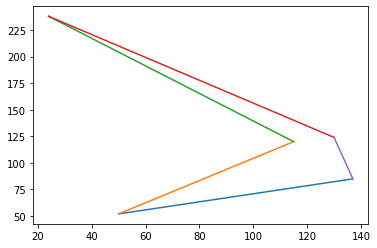

In [11]:
"""IMPORTING MODULES FOR OUR USE"""
import random
import matplotlib.pyplot as plt
import shapely
from math import atan
from shapely.geometry import LineString, Point
"""SOME GLOBALS TO BE USED ACROSS FUNCTIONS"""
chromosomes=[]
fitnesslist=[]
indices=[]
population=[]
"""A FUNCTION TO CONVERT INTEGER TO BINARY"""
def decimalToBinary(n):
    return bin(n).replace("0b", "")
"""A FUNCTION TO MAKE 8 BIT BINARY EQUIVALENTS"""
def formater(inpbin):
    a=len(inpbin)
    ival=8-a;
    retstr=""
    for i in range(0,ival):
        retstr=retstr+"0"
    inpbin=retstr+inpbin
    return inpbin
"""A FUNCTION TO FIND SLOPE"""
def FindSlope(inpset):
    j=1
    slist=[]
    for i in range(0,len(inpset)-1):
        x1=inpset[i][0]
        y1=inpset[i][1]
        x2=inpset[j][0]
        y2=inpset[j][1]
        if x2-x1==0:
            x2=x2+2
        slope=(y2-y1)/(x2-x1)
        slist.append(slope)
        j=j+1
    x1=inpset[len(inpset)-1][0]
    y1=inpset[len(inpset)-1][1]
    x2=inpset[0][0]
    y2=inpset[0][1]
    if x2-x1==0:
            x2=x2+2
    slope=(y2-y1)/(x2-x1)
    slist.append(slope)
    return slist
"""FUNCTION FOR DRAWING"""
def draw(p):
    temp = p[:]   
    temp.append(temp[0])    
    for i in range(pol_size):
        plt.plot([temp[i][0],temp[i+1][0]],[temp[i][1],temp[i+1][1]])
    plt.show()
"""A SORTING FOR OUR USE"""
def bubbleSort(arr,arr1,arr2):
    n = len(arr)
 
    
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j + 1] :
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                arr1[j], arr1[j + 1] = arr1[j + 1], arr1[j]
                arr2[j], arr2[j + 1] = arr2[j + 1], arr2[j]

"""ANGLE FINDER"""
def findAngle(M1, M2):
    PI = 3.14159265
    # Store the tan value  of the angle
    angle = abs((M2 - M1) / (1 + M1 * M2))
    # Calculate tan inverse of the angle
    ret = atan(angle)
    # Convert the angle from
    # radian to degree
    val = (ret * 180) / PI
    # Print the result
    return val

"""A FUNCTION FOR FINDING WHETHER POLYGON IS CONVEX OR NOT"""
def IsConvex(inpset):
    slopes=FindSlope(inpset)
    angles=[]
    j=1
    for i in range(0,len(slopes)-1):
        angles.append(findAngle(slopes[i],slopes[j]))
        j=j+1
    angles.append(findAngle(slopes[len(slopes)-1],slopes[0]))
      
        
#     print("Slopes are::",end="")    
#     print(slopes)
#     print("Angles found are::",end="")
#     print(angles)   
    

    
"""A FUNCTION TO FIND INTERSECTING EDGES OF A POLYGON"""

def lineintersection(inplist):
    j=1
    lines=[]
    j=1
    totalcount=0
    for i in range(0,len(inplist)-1):
        tlist=[]
        tlist.append(inplist[i])
        tlist.append(inplist[j])
        lines.append(tlist)
        j=j+1
    tlist=[]
    tlist.append(inplist[len(inplist)-1])
    tlist.append(inplist[0])
    lines.append(tlist)
#     print(lines)

    
    for i in range(0,len(lines)):
        A=tuple(lines[i][0])

        B=tuple(lines[i][1])
        counter=0
        for j in range(0,len(lines)):
            if(i!=j and j!=i+1 and j!=i-1):
                if(i==len(lines)-1):
                    if j==0:
                        continue
                if(i==0):
                    if j==len(lines)-1:
                        continue
                C=tuple(lines[j][0])

                D=tuple(lines[j][1])

                line1 = LineString([A, B])
                line2 = LineString([C, D])

                
                point_of_intersection=line1.intersects(line2)
                if(point_of_intersection):
                    counter=counter+1
        totalcount=totalcount+counter
    return totalcount
"""A FUNCTION TO CACLULATE PROBABILITY FOR USE IN WHEEL SELECTION"""
def prob_calc():
    
    totalval=sum(fitnesslist)
    probability=[]
    for i in fitnesslist:
        s = round ( 1- ( i / totalval ) , 2 )
        probability.append(s)

    print(probability)   
    j=len(probability)//2  
    i=0
    while (i<percent):
        n = random.randint(1,j)  
        if n not in indices:    
            indices.append(n)
        else:  
            i = i-1
        i+=1   
        
#     print("List of indexes : ",indices) 
"""BINARY TO DECIMAL CONVERTER"""
def binaryToDecimal(inp):
    counter=0
    retlist=[]
    temlist=[]
    for i in range(0,len(inp),8):
        tem=""
        for j in range(i,i+8):
            tem=tem+inp[j]
        binary=int(tem) 
#         print("Here",binary)
        binary1 = binary
        decimal, i, n = 0, 0, 0
        while(binary != 0):
            dec = binary % 10
            decimal = decimal + dec * pow(2, i)
            binary = binary//10
            i += 1
        temlist.append(decimal)
        counter=counter+1
        if(counter==2):
            counter=0
            retlist.append(temlist)
            temlist=[]
    return retlist
            
        
    
    

"""A UTILITY METHOD"""
def listToString(s): 
    
    str1 = ""   
    return (str1.join(s))

"""MUTATION FUNCTION FOR GA"""
def mutation(testval):
    arr=list(testval)
    index = random.randint(1,len(arr))
    if ( arr[index] == "0" ):  
        arr[index] = "1"    
    elif ( arr[index] == "1" ):  
        arr[index] = "0"
    retval=listToString(arr)
    return retval
    
    
    
    
"""CROSSOVER FUNCTIONALITY OF A GA"""
def crossover(X,Y):
    
    print("Initial Chromosome 1",X)
    print("Initial Chromosome 2",Y)
    
    index = random.randint(1,len(X))   # generating random index
    print("Cross Over Index",index)
    
    
    X_prime = X[0:index] + Y[index:]    
    Y_prime = Y[0:index] + X[index:]

    mutated1=mutation(X_prime)
    mutated2=mutation(Y_prime)
    adder1=binaryToDecimal(mutated1)
    adder2=binaryToDecimal(mutated2)
    chromosomes.append(mutated1)
    chromosomes.append(mutated2)
    population.append(adder1)
    population.append(adder2)
    fitnesslist.append(lineintersection(adder1))
    fitnesslist.append(lineintersection(adder2))

    
"""ROULETTE WHEEL SELECTION PROCEDURE"""
def roul_wheel(inputval,psize):
    prob_calc()
    """REMOVING THE DEFECTED SPECIES FROM POPULATION"""
    for i in range ( len(population)-1 , len(population) - inputval -1 , -1 ):
        population.remove( population[i] )
        chromosomes.remove(chromosomes[i])
        fitnesslist.remove(fitnesslist[i])
    
    print("After removal of defected values",len(population))

    print("After removal of defected values",len(chromosomes))
    for i in range (0,percent,2):
        crossover(chromosomes[indices[i]] , chromosomes[indices[i+1]])

    print("Updated",len(chromosomes))   
    print("Updated",len(population))   
        
        
        

    
    
    
"""MAIN METHOD TO FINALLY RUN OUR ALL FUNCTIONALITY OF A GA"""
p_size=int(input("Enter Population Size to Begin With"))
pruner=False
percent=(20*p_size)//100
if percent%2 !=0:
    percent=percent+1
pol_size=int(input("Enter Number of Sides of Polygon To Begin With"))
iteration_size=int(input("Enter Number of Iteration to perform on GA"))
tlist=[]
plist=[]
"""INITIAL RANDOM POPULATION TO BEGIN WITH"""
clist=""
for i in range(0,p_size):
    tlist=[]
    for j in range(0,pol_size):
        plist=[]
        x=random.randint(0,255)
        y=random.randint(0,255)
        
        plist.append(x)
        plist.append(y)
        
        tlist.append(plist)
    population.append(tlist)
print("Value=",iteration_size)
for l in range(0,iteration_size):
    indices.clear()
    print("L val::",l)
    chromosomes.clear()
    
    print("Population is::",population)
    for i in population:
        clist=""
        for j in i:
            for k in j:
                val=decimalToBinary(k)
                val=formater(val)
                clist=clist+val
        chromosomes.append(clist)
    print("Chromosomes is::",chromosomes)
    fitnesslist.clear()
    for i in population:
            IsConvex(i)
            fitnesslist.append(lineintersection(i))
    
    bubbleSort(fitnesslist,population,chromosomes)
    roul_wheel(percent,p_size)
    for t in range(len(fitnesslist)):
        if fitnesslist[t]==0:
            draw(population[t])
            pruner=True
            break
    if pruner:
        break
    else:
        print("No Such Polygon Without Intersecting Edges and Convexity")
    print(fitnesslist)
    print("<<<<<<<<<<<<<<<<____________________________>>>>>>>>>>>>>>>>>>>>>\n\n\n")